<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/An%C3%A1lise_do_suic%C3%ADdio_no_Brasil_entre_2014-2018%2C_com_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setembro Amarelo: análise do suicídio no Brasil com Data Science

Iniciativa do Centro de Valorização da Vida (CVV), do Conselho Federal de Medicina (CFM) e da Associação Brasileira de Psiquiatria e, iniciada em 2001, é uma campanha brasileira de prevenção ao suicídio, realizada em setembro pois o dia 10 de setembro é o Dia Mundial de Prevenção do Suicídio.

<center><image src="https://upload.wikimedia.org/wikipedia/pt/thumb/7/72/Falar_e_a_melhor_solucao.jpg/220px-Falar_e_a_melhor_solucao.jpg"></center>

Segundo a Organização Mundial da Saúde (OMS), o Brasil ocupa o oitavo lugar no número de suicídios no mundo: São 32 brasileiros por dia. Isso faz com que o suicídio tenha uma taxa de vitima maior que o da AIDS, por exemplo.
Diante disso, durante o mês inteiro são feitas diversas campanhas, palestras e ações para a conscientização sobre o suicídio.

Neste artigo, vamos ver alguns dados do suicídio no Brasil durante os anos de 2014-2018, analisá-los e trazer algumas estatísticas sobre os mesmos e, assim, ajudar na conscientização de que o suicídio é uma doença séria. 


##Importação dos Dados


Os dados [estão hospedados nesta página](https://www.kaggle.com/psicodata/dados-de-suicdio-no-brasil-2014-a-2018), e traz informações os casos de suicídios no Brasil entre os anos de 2014 e 2018.

Vamos agora importar os dados.

In [1]:
# Importar as bibliotecas
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importar o arquivo
df = pd.read_csv('/content/datasus_suicidio_2014_2018.csv', sep=',',encoding='latin-1')

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [3]:
# Ver o formato do arquivo
print('Formato do Dataframe: ', df.shape)

Formato do Dataframe:  (58634, 17)


Temos então nosso dataset com 58 634 linhas e 17 colunas.

In [4]:
# Verificar os tipos das entradas do dataset
display(df.dtypes)

estado         object
ano             int64
CIRCOBITO      object
DTOBITO        object
DTNASC         object
SEXO           object
RACACOR        object
ESTCIV         object
ESC            object
OCUP           object
CODMUNRES      object
LOCOCOR        object
ASSISTMED      object
CAUSABAS       object
CAUSABAS_O     object
idade         float64
mes             int64
dtype: object

##Análise dos Dados

**Dicionário das variáveis**

* `estado` - UF do caso registrado.
* `ano` - Ano do caso registrado.
* `CIRCOBITO` - Circunstância do óbito. 1 : Acidente, 2 : Suicídio, 3 : Homicídio, 4 : Outro, 0;5;6;7;8;9 : NA.
* `DTOBITO` - data do óbito.
* `DTNASC` - data de nascimento.
* `SEXO` - sexo. 1 : Masculino, 2 : Feminino, 0;9 : NA.
* `RACACOR` - raça. 1 : Branca, 2 : Preta, 3 : Amarela, 4 : Parda, 5 : Indígena, 0;6;7;8;9 : NA.
* `ESTCIV` - estado civil. 1 : Solteiro, 2 : Casado, 3 : Viúvo, 4 : Separado judicialmente, 5 : União consensual, 0;6;7;8;9 : NA.
* `ESC` - escolaridade. 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA.
* `OCUP` - ocupação. Para óbitos a partir de 2006, segue-se a tabela CBO2002.
* `CODMUNRES` - município de residência do falecido (codificado).
* `LOCOCOR` - Local de ocorrência do óbito. 1 : Hospital, 2 : Outro estabelecimento de saúde, 3 : Domicílio, 4 : Via pública, 5 : Outros, 9 : NA.
* `ASSISTMED` - Assistência médica. 1 : Sim, 2 : Não, 9 : NA.
* `CAUSABAS` - Causa básica do óbito. Código CID-10.
* `CAUSABAS_O` - Causa básica do óbito. Código CID-10.
* `idade` - Idade da pessoa.
* `mes` - O mês do óbito.

###Análise Inicial

Inicialmente, vamos analisar os tipos de morte do nosso dataset.

In [5]:
# Ver as causas das mortes
df.CIRCOBITO.unique()

array(['Suicídio', 'Acidente', nan, 'Homicídio', 'Outro'], dtype=object)

Logo, no nosso dataset existem outras causas de morte fora suicídio. 

Dessa forma, vamos criar um subdataset só com os dados cuja causa de morte foi suicídio.

In [6]:
#Criando um subdataset so com os dados de Suicídio
df_suicidio = df[df.CIRCOBITO == 'Suicídio'].copy()
print('Formato do subdataset: ', df_suicidio.shape)

Formato do subdataset:  (55484, 17)


Vamos inicialmente ver a cara do nosso subdataset.

In [7]:
#Ver as 5 primeiras entradas
df_suicidio.head()

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2


Vamos abaixo ver a qualidade do nosso dataset quantificando a quantidade de valores ausentes ‘NaN’.

Notamos que existem muitos valores ausentes, no entanto alguns atributos não possuem dados faltantes como, por exemplo, `OCUP`, `CODMUNRES`, `ano` e `estado`.

Por outro lado, o atributo `ASSISTMED` tem um total de 16216 valores 'NaN' e, já `ESC` possui 12813 valores 'NaN'.

In [8]:
#Quantidade de valores NaN
df_suicidio.isnull().sum().sort_values(ascending=False)

ASSISTMED     16216
ESC           12813
ESTCIV         4048
RACACOR        1231
DTNASC          208
idade           208
LOCOCOR         147
CAUSABAS_O       76
SEXO             14
ano               0
CIRCOBITO         0
DTOBITO           0
mes               0
OCUP              0
CODMUNRES         0
CAUSABAS          0
estado            0
dtype: int64

Vamos ver agora uma série de histogramas para enxergar alguns insights do nosso dataset.

###Tendência da taxa de suicídio no Brasil por: 


####Estado:

Inicialmente vamos analisar a quantidade de suicídios por cada estado do Brasil.

Com o histograma abaixo, é possível ver que a maioria dos atos foram feitos em São Paulo, seguido por Minas Gerais, Rio Grande o Sul e Bahia. 

O que é compreensível, visto que, [segundo o IBGE](https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/28668-ibge-divulga-estimativa-da-populacao-dos-municipios-para-2020#:~:text=No%20ranking%20dos%20estados%2C%20São,17%2C4%20milhões%20de%20habitantes.), SP é o estado com a maior população do Brasil, seguido por MG. No entanto, fica o alerta para os estados da BA e do RS.


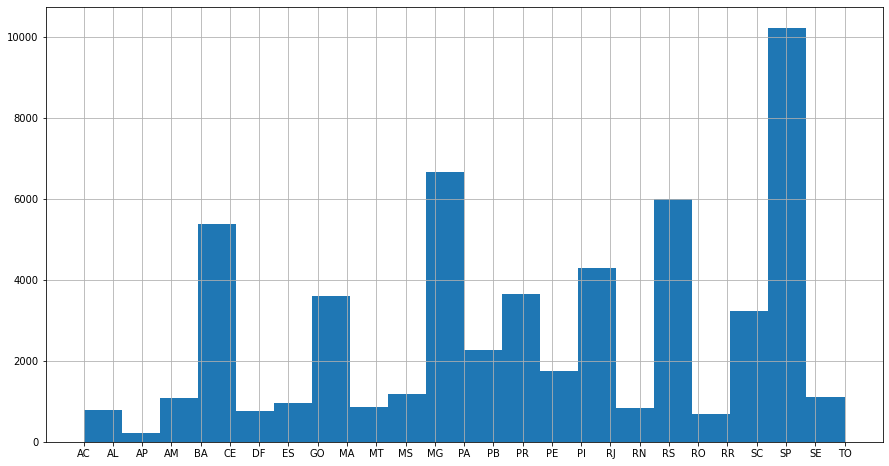

In [9]:
# Histograma
df_suicidio['estado'].hist(bins=20, figsize=(15,8));

#### Ano:


Podemos analisar também a quantidade de casos com o passar dos anos, pois assim podemos ver se os casos vem diminuindo ou aumentando.

No histograma abaixo, percebemos inicialmente que com o passar do tempo o número de casos aumentou. Chegando a um aumento de quase 2000 casos de 2014 para 2018.

Constatado que o número de casos aumentou, é preciso então que as campanhas para a prevenção e divulgação do suicídio sejam ampliadas cada vez mais.

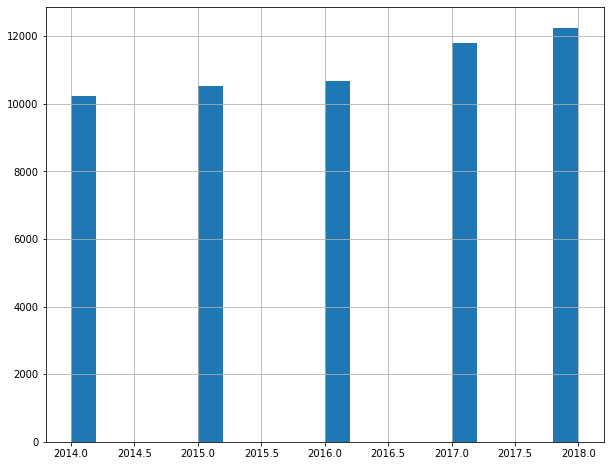

In [10]:
# Histograma
df_suicidio['ano'].hist(bins=20, figsize=(10,8));

####Idade:

Outro fator importante, é analisar a idade das pessoas que tiraram sua própria vida.

Abaixo, vemos que a faixa etária que mais comete esse ato tem entre 30-40 anos.


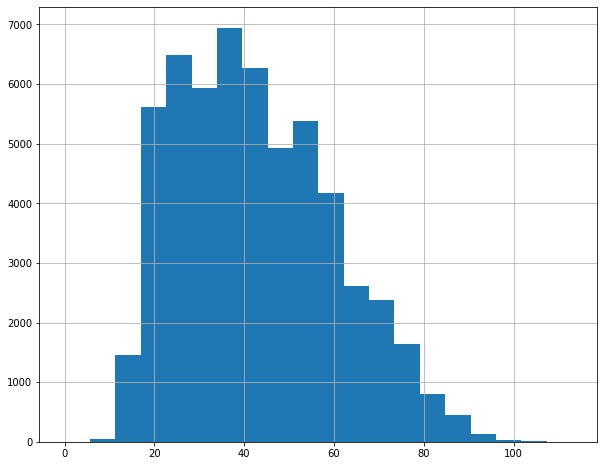

In [13]:
# Histograma
df_suicidio['idade'].hist(bins=20, figsize=(10,8));

#### Sexo:

Uma outra análise de grande importância é ver a porcentagem dos suicídios entre homens e mulheres.

Como mostra o gráfico abaixo, a grande maioria das pessoas que tira a sua própria vida são homens com 78,7%, contra 21,3% de mulheres.

Dessa forma,  fazer campanhas a mais que sejam focadas na população masculina pode contribuir com redução desses números.



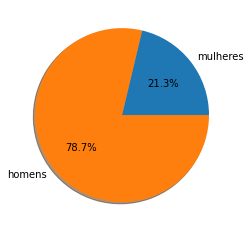

In [9]:
#Extrair valores, em porcentagem, entre homens e mulheres
homens_mulheres = df_suicidio.groupby('SEXO').ano.sum() / df_suicidio.groupby('SEXO').ano.sum().sum()

#Plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

####Estado Civil:

Outro fator a ser analisado, é o Estado civil da pessoa.

Pelo histograma abaixo, é possível ver que a maioria das pessoas que tiraram sua própria vida eram solteiras.

Assim, podemos fazer uma suposição de que a pessoa poderia estar solitária.

Dessa forma, se faz muito importante a divulgação do [número para ligação, 188, do CVV](https://www.cvv.org.br)(Centro de Valorização da Vida realiza apoio emocional e prevenção do suicídio, atendendo voluntária e gratuitamente todas as pessoas que querem e precisam conversar, sob total sigilo por telefone, email e chat 24 horas todos os dias).


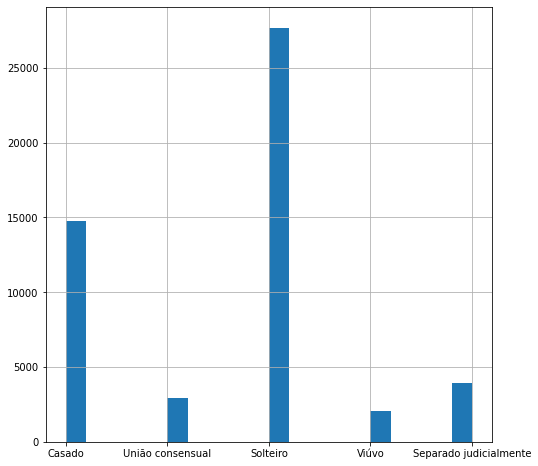

In [13]:
# Histograma
df_suicidio['ESTCIV'].hist(bins=20, figsize=(8,8));

####Etnia:

Por fim, vamos ver a quantidade de casos por etnia.

Pelo gráfico abaixo, fica evidente que as pessoas que mais tiram suas vidas são brancas ou pardas.


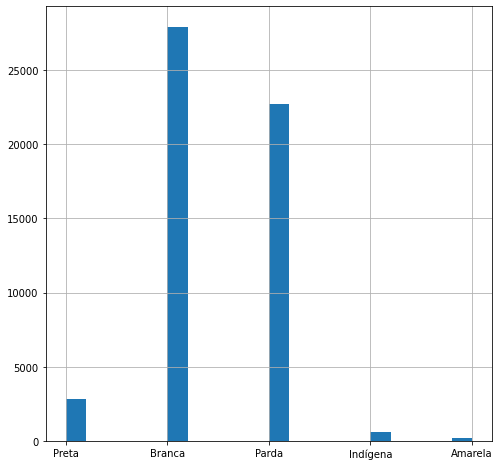

In [17]:
# Histograma
df_suicidio['RACACOR'].hist(bins=20, figsize=(8,8));

## Conclusão


Dessa forma, acabamos o projeto.

Diante disso, vimos que com o passar dos anos de 2014 a 2018 que o número de casos aumentou tendo na faixa etária dos 30-40 anos a maior quantidade de casos, além de homens como 78.7% das pessoas que cometem suicídio.

Outro fator, é a localidade dos fatos. Com a maior quantidade de casos temos a maior metrópole brasileira, além de Minas, Bahia e Rio Grande do Sul.

Por último, verificamos que a maioria das pessoas que tirou a sua própria vida eram solteiras e/ou brancas ou pardas.


Ficou claro que então que mais medidas no combate ao suicídio precisam ser tomadas. 

Ainda durante o projeto foram dadas algumas sugestões como, por exemplo, a divulgação do [telefone do CVV (188)](https://www.cvv.org.br), a criação de campanhas específicas tanto para os estados com a maior quantidade de casos quanto para pessoas que tenham tendencias suicidas que entrem nas características de etnia branca/parda, solteiro e tenham entre 30-40 anos. 

Ao fim deste artigo, espero que os leitores tenham retirado um pouco de conhecimento sobre um problema tão sério.

Por fim, lembre-se que não é frescura e que ninguém está querendo aparecer. Na verdade, a gente nunca tem a mínima ideia do que a outra pessoa está passando. Qualquer atitude que você tenha que possa contribuir para a prevenção do suicídio.